In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import sklearn
from sklearn import linear_model,dummy,metrics
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn .metrics import *

In [2]:
df = pd.read_csv("hcvdat0.csv")
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [3]:
print("First five rows")
print(df.head())
print("********************")
print("columns",df.columns)
print("********************")
print("shape:",df.shape)
print("********************")
print("Size",df.size)
print("********************")
print(df.describe())
print("********************")
print(df.nunique())

First five rows
   Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7  
********************
columns Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')
********************
shape: (615, 14)
********************
Size 8610
********************
       Unnamed: 0         Age         ALB         ALP         ALT       

In [4]:
df = df[df.columns[1:]]
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
Value_list = df['Category'].unique()
for x in range(len(Value_list)):
    df.Category[df['Category'] == Value_list[x]] = x
df.head()

Value_list = df['Sex'].unique()
for x in range(len(Value_list)):
    df.Sex[df['Sex'] == Value_list[x]] =x
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [7]:
df = df.fillna(0)

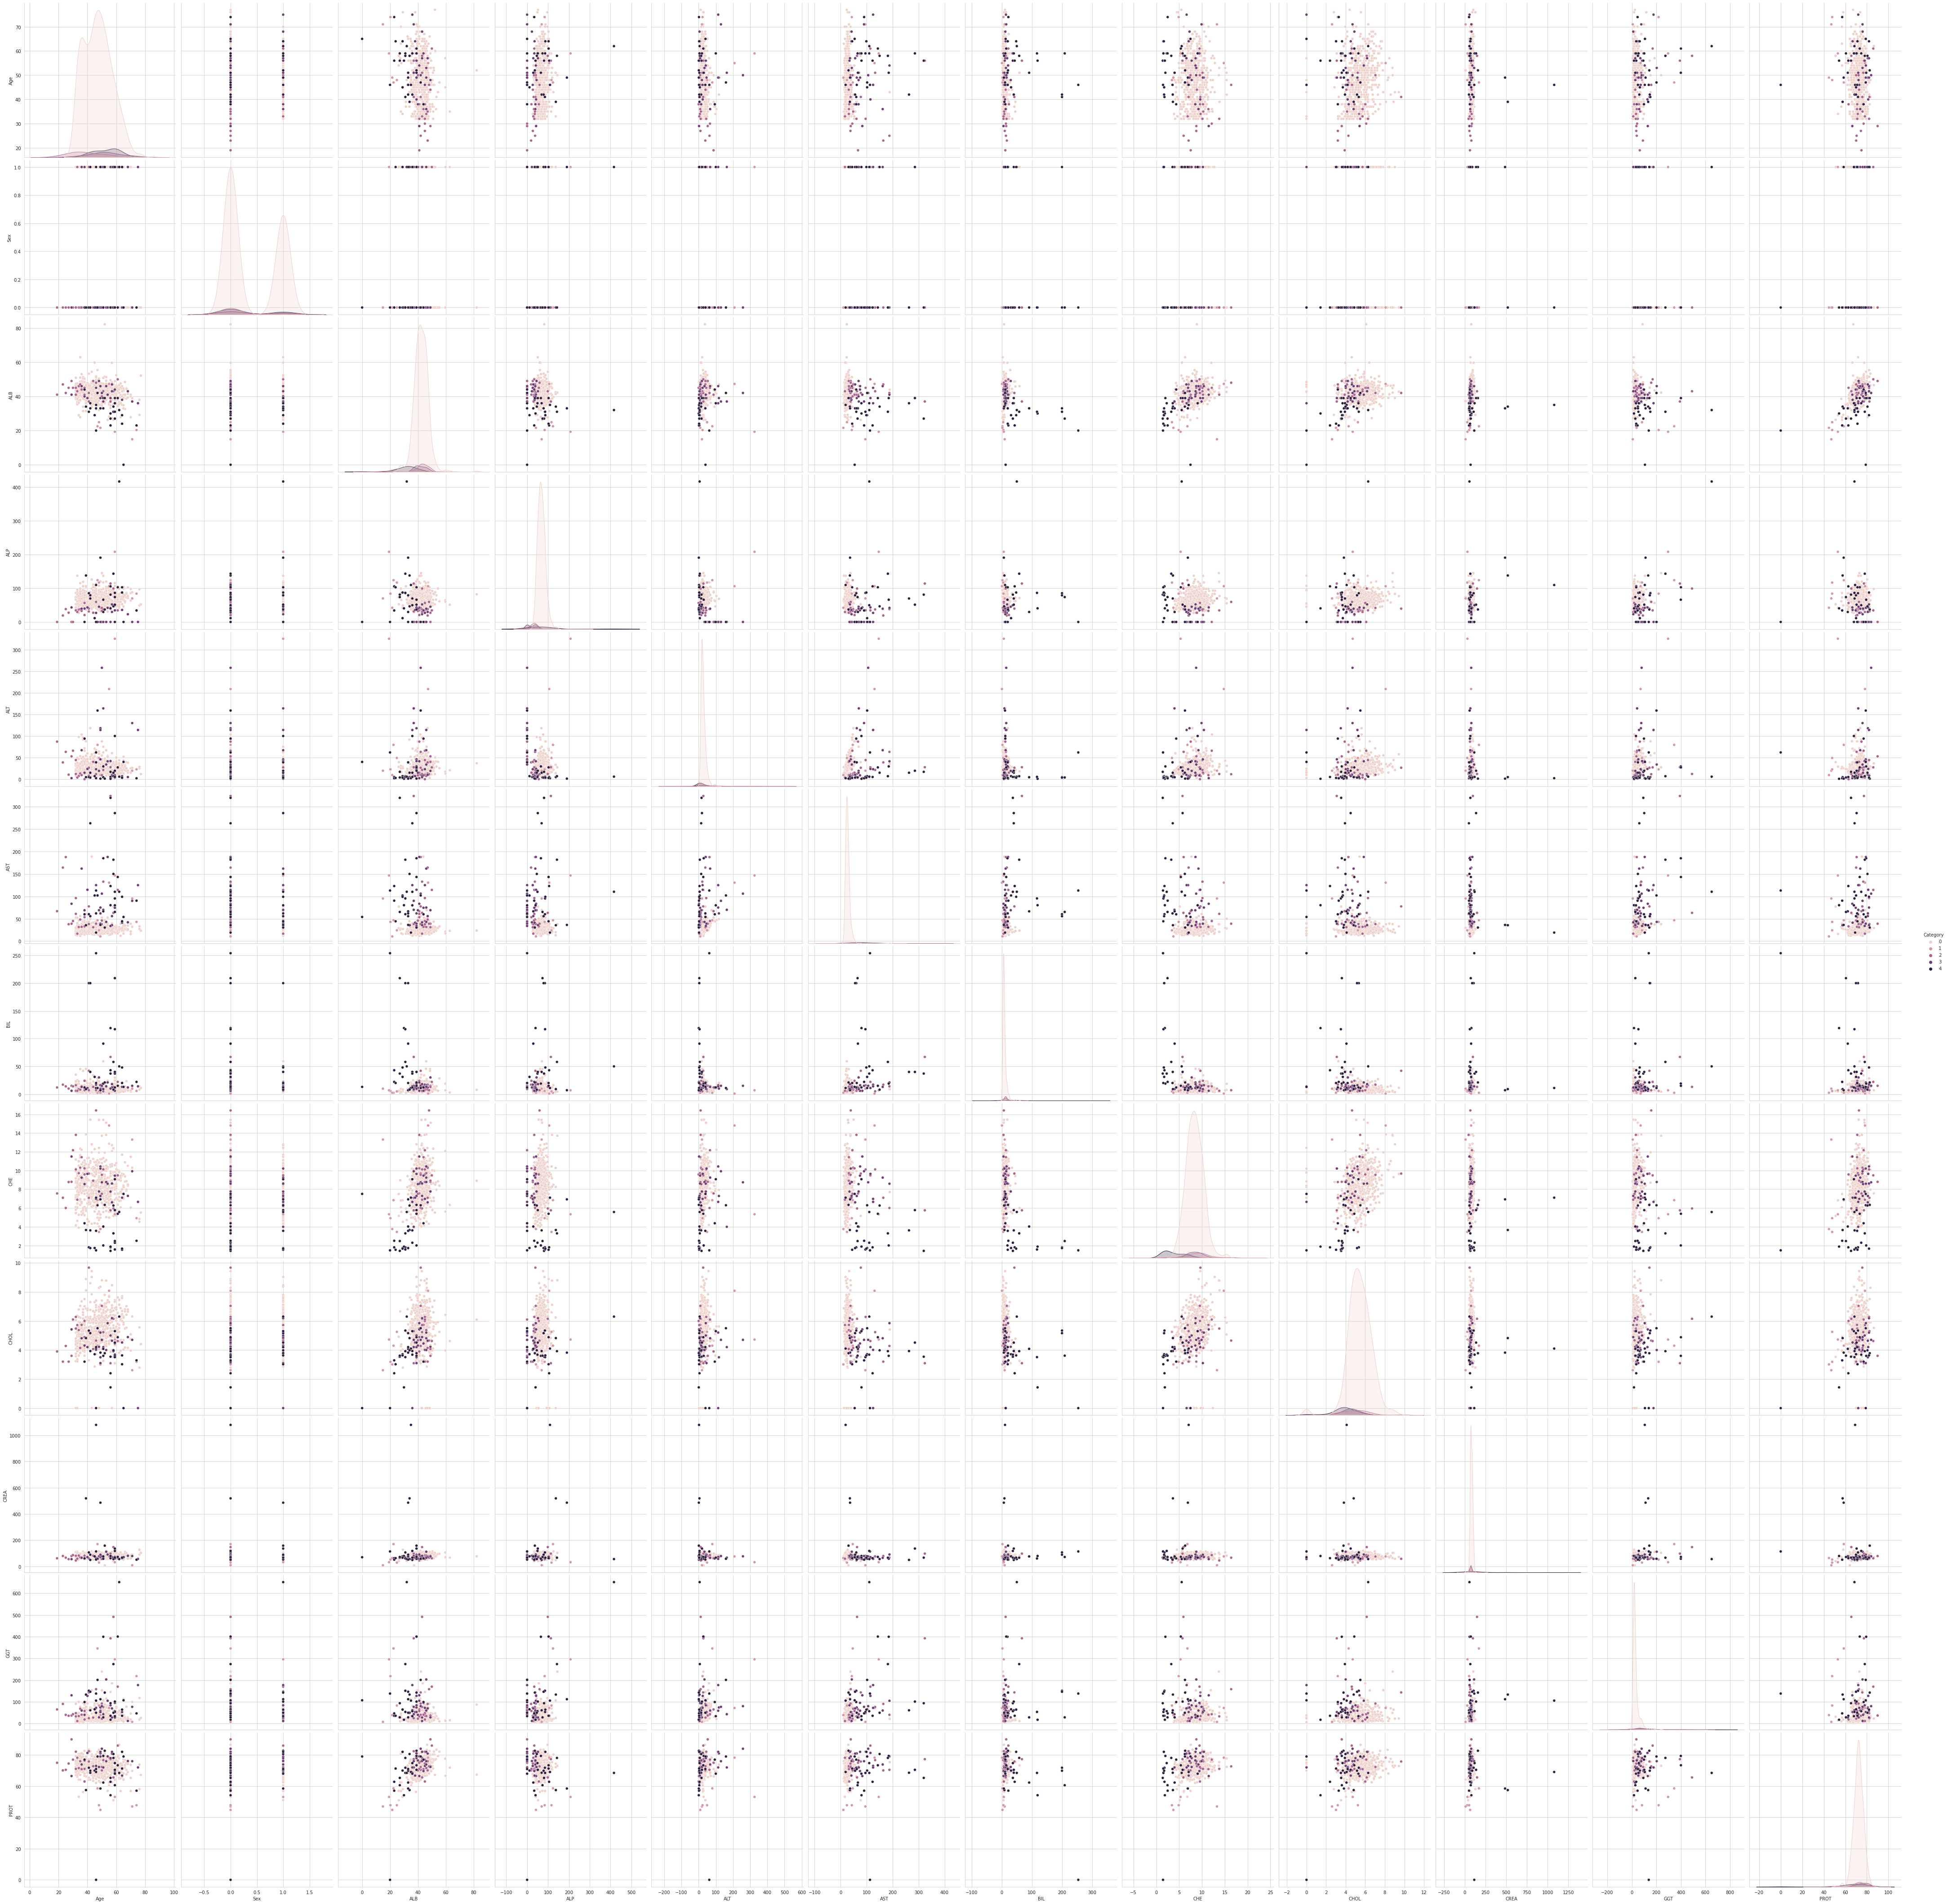

In [8]:
sns.set_style("whitegrid")
sns.pairplot(df,hue = 'Category' ,height=5);
plt.show()

In [9]:
#Classification
X = df[['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']] #predictors
y = df['Category'] #target

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
print("Category Counts")
print(y_test.value_counts(), end="\n\n")
print("Category Proportions")
print(y_test.value_counts()/len(y_test))

Category Counts
0    153
4     11
2     10
3      8
1      3
Name: Category, dtype: int64

Category Proportions
0    0.827027
4    0.059459
2    0.054054
3    0.043243
1    0.016216
Name: Category, dtype: float64


In [12]:
logisticRegr = LogisticRegression(solver='liblinear',fit_intercept=True)
logisticRegr.fit(X_train, y_train)
logis_pred = logisticRegr.predict(X_test)
logis_pred_prob = logisticRegr.predict_proba(X_test)

In [13]:
dummy = DummyClassifier(strategy= 'most_frequent')
dumb = dummy.fit(X_train,y_train)
dumb_pred = dumb.predict(X_test)
dumb_pred_prob = dumb.predict_proba(X_test)

In [14]:
print("Test accuracy (Logistic Regression) =", logisticRegr.score(X_test,y_test), end="\n\n")
print("Test accuracy(Dummy Classifier) =", dumb.score(dumb_pred,y_test))

Test accuracy (Logistic Regression) = 0.9081081081081082

Test accuracy(Dummy Classifier) = 0.827027027027027


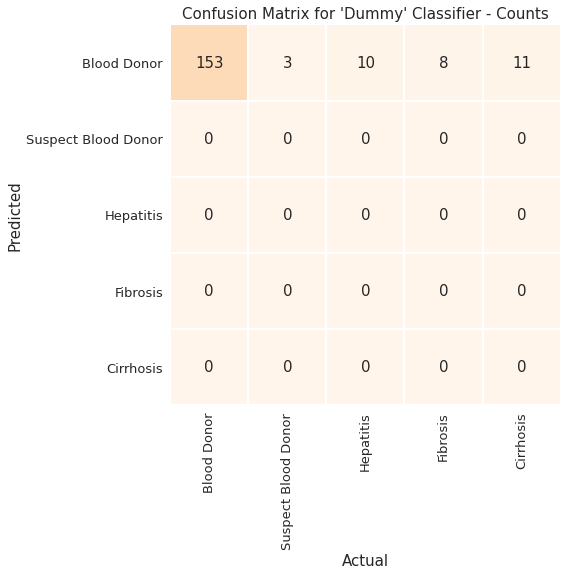

In [15]:
#confusion matrix for Dummy classifier
cm_dummy = confusion_matrix(y_test, dumb_pred)
cm_dummy_df = pd.DataFrame(cm_dummy)

fig, ax=plt.subplots(figsize = (7,7))
sns.heatmap(cm_dummy_df.T, annot=True, annot_kws={"size": 15}, cmap="Oranges", vmin=0, vmax=800, fmt='.0f', linewidths=1, linecolor="white", cbar=False,xticklabels=["Blood Donor","Suspect Blood Donor","Hepatitis","Fibrosis","Cirrhosis"], yticklabels=["Blood Donor","Suspect Blood Donor","Hepatitis","Fibrosis","Cirrhosis"])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["Blood Donor","Suspect Blood Donor","Hepatitis","Fibrosis","Cirrhosis"], fontsize=13)
ax.set_yticklabels(["Blood Donor","Suspect Blood Donor","Hepatitis","Fibrosis","Cirrhosis"], fontsize=13)
plt.title("Confusion Matrix for 'Dummy' Classifier - Counts", fontsize=15)
plt.show()

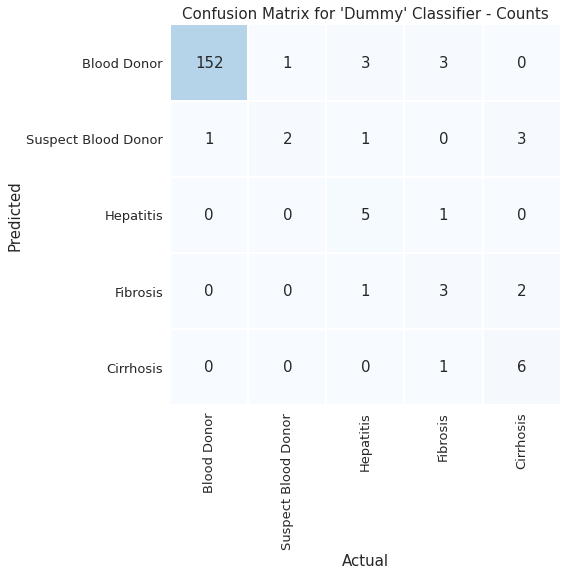

In [16]:
cm_logis = confusion_matrix(y_test, logis_pred)
cm_logis_df = pd.DataFrame(cm_logis)

fig, ax=plt.subplots(figsize = (7,7))
sns.heatmap(cm_logis_df.T, annot=True, annot_kws={"size": 15}, cmap="Blues", vmin=0, vmax=500, fmt='.0f', linewidths=1, linecolor="white", cbar=False, xticklabels=["Blood Donor","Suspect Blood Donor","Hepatitis","Fibrosis","Cirrhosis"], yticklabels=["Blood Donor","Suspect Blood Donor","Hepatitis","Fibrosis","Cirrhosis"])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["Blood Donor","Suspect Blood Donor","Hepatitis","Fibrosis","Cirrhosis"], fontsize=13)
ax.set_yticklabels(["Blood Donor","Suspect Blood Donor","Hepatitis","Fibrosis","Cirrhosis"], fontsize=13)
plt.title("Confusion Matrix for 'Dummy' Classifier - Counts", fontsize=15)
plt.show()

In [17]:
y_predict = logisticRegr.predict(X_test)
print("Accuracy LR: {:.2f}".format(logisticRegr.score(X_test,y_test)))

Accuracy LR: 0.91


In [18]:
#Clustering
from sklearn.cluster import KMeans

kmeans= KMeans(5)
kmeans.fit(X_train)

KMeans(n_clusters=5)

In [19]:
NN = X_train
NN['predict'] = kmeans.fit_predict(NN)

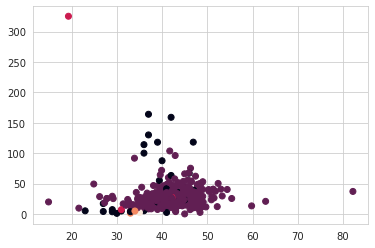

In [20]:
import matplotlib.pyplot as plt
plt.scatter(NN['ALB'], NN['ALT'], c=NN['predict'])

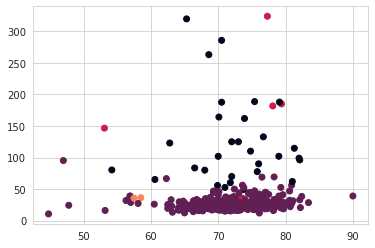

In [21]:
import matplotlib.pyplot as plt
plt.scatter(NN['PROT'], NN['AST'], c=NN['predict'])

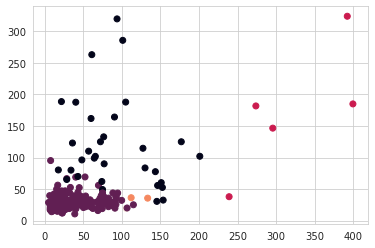

In [22]:
import matplotlib.pyplot as plt
plt.scatter(NN['GGT'], NN['AST'], c=NN['predict'])

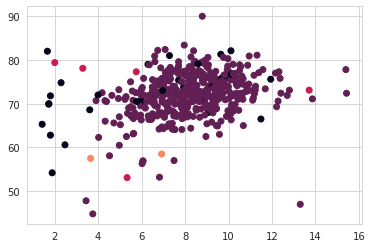

In [23]:
import matplotlib.pyplot as plt
plt.scatter(NN['CHE'], NN['PROT'], c=NN['predict'])